# Práctica 2 - Complejidad de H y Modelos Lineales

### Alumno: MIGUEL GARCÍA LÓPEZ
### Grupo: A2

Límite de entrega: 8 de Mayo de 2022 a las 23:59 (PRADO)\
Valoración máxima: 12 puntos (+1.5 puntos de Bonus)

Es obligatorio presentar un informe con las valoraciones y decisiones adoptadas en el desarrollo de cada uno de
los apartados. En dicho informe se incluirán los gráficos generados. También deberá incluirse una valoración sobre la
calidad de los resultados encontrados. Sin este informe se considera que el trabajo NO ha sido presentado. El informe debe estar integrado en este mismo cuaderno
(intercalando texto, código y resultados).

# 1. EJERCICIO SOBRE LA COMPLEJIDAD DE H Y EL RUIDO (5 puntos)

En este ejercicio debemos aprender la dificultad que introduce la aparición de ruido en las etiquetas a la hora de elegir la clase de funciones más adecuada. Haremos uso de tres funciones incluidas en el fichero template trabajo2.py:

 * simula unif (N, dim, rango), que calcula una lista de N vectores de dimensión dim. Cada vector contiene dim números aleatorios uniformes en el intervalo rango.

* simula gauss(N, dim, sigma), que calcula una lista de longitud N de vectores de dimensión dim, donde cada posición del vector contiene un número aleatorio extraído de una distribucción Gaussiana de media 0 y varianza dada, para cada dimensión, por la posición del vector sigma.

* simula recta(intervalo), que simula de forma aleatoria los parámetros, v = (a, b) de una recta, y = ax + b, que corta al cuadrado [−50, 50] × [−50, 50].

EJERCICIO.1.1:  1 punto.\
Dibujar gráficas con las nubes de puntos simuladas con las siguientes condiciones:
* a) Considere N = 50, dim = 2, rango = [−50, 50] con simula unif (N, dim, rango).
* b) Considere N = 50, dim = 2 y sigma = [5, 7] con simula gauss(N, dim, sigma).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


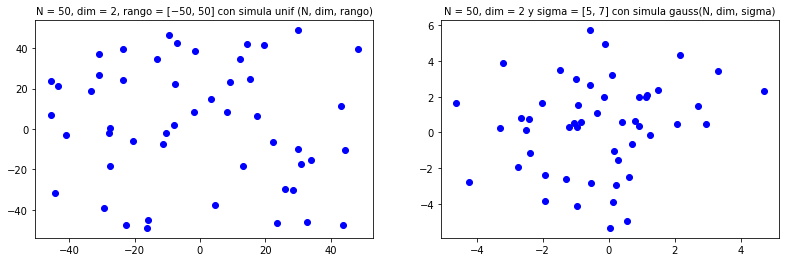

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from google.colab import drive
drive.mount('/content/drive')

def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out


def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b


# EJERCICIO 1.1: Dibujar una gráfica con la nube de puntos de salida correspondiente

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

x = simula_unif(50, 2, [-50,50])
ax.scatter(x[:,0], x[:,1], c = 'b')
ax.set_title(r'N = 50, dim = 2, rango = [−50, 50] con simula unif (N, dim, rango)', fontsize=10)

x = simula_gauss(50, 2, np.array([5,7]))
ax2.scatter(x[:,0], x[:,1], c = 'b')
ax2.set_title(r'N = 50, dim = 2 y sigma = [5, 7] con simula gauss(N, dim, sigma)', fontsize=10)

plt.show()

EJERCICIO.1.2: 4 puntos.
Vamos a valorar la influencia del ruido en la selección de la complejidad de la clase de funciones. Con ayuda de la función simula unif (100, 2, [−50, 50]) generamos una muestra de puntos 2D a los que vamos añadir una etiqueta usando el signo de la función f (x, y) = y − ax − b, es decir el signo de la distancia de cada punto a la recta simulada con simula recta().

**a**) (1 punto) Dibujar un gráfico 2D donde los puntos muestren (use colores) el resultado de su etiqueta. Dibuje también la recta usada para etiquetar.  Observe que todos los puntos están bien clasificados respecto de la recta.\
**b**) (0.5 puntos) Modifique de forma aleatoria un 10 % de las etiquetas positivas y otro 10 % de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo la gráfica anterior. Ahora habrá puntos mal clasificados respecto de la recta.\
**c**) (2.5 puntos) Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta
* $f(x,y) = (x-10)^2+(y-20)^2-400$
* $f(x,y) = 0.5(x+10)^2+(y-20)^2-400$
* $f(x,y) = 0.5(x-10)^2-(y+20)^2-400$
* $f(x,y) = y-20x^2 -5x+3$ 

Visualizar el etiquetado generado en el apartado 2b junto con la gráfica de cada una de las funciones. Comparar las regiones positivas y negativas de estas nuevas funciones con las obtenidas en el caso de la recta. Argumente si estas funciones más complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga qué consecuencias extrae sobre la influencia de la modificació de etiquetas en el proceso de aprendizaje. Explique el razonamiento.

a)

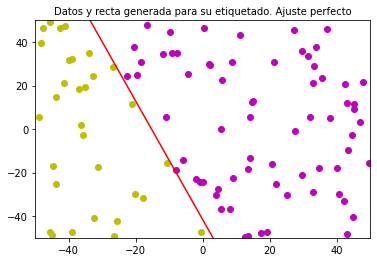

In [21]:
# La funcion np.sign(0) da 0, lo que nos puede dar problemas
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)
 
# Generamos puntos con simula_unif
x = simula_unif(100, 2, [-50,50])
 
# Recogemos recta generada con simula_recta
a, b = simula_recta([-50,50])

# Recojo etiquetas para cada elemento de la muestra
y = [f(x1, x2, a, b) for x1, x2 in zip(x[:,0], x[:,1])]

x1, x2 = [], []

# Diferencio clases de datos con dos arrays mirando las etiquetas
for etiqueta, dat in zip(y, x):
	if etiqueta == 1:
		x1.append(np.array([dat[0], dat[1]]))
	else:
		x2.append(np.array([dat[0], dat[1]]))
	
x1 = np.array(x1)
x2 = np.array(x2)

# Dibujo gráfica 2D
plt.scatter(x1[:,0], x1[:,1], c = 'm', label = '1')
plt.scatter(x2[:,0], x2[:,1], c = 'y', label = '-1')
eje_x = np.linspace(-50, 50, 100)
f_recta = a * eje_x + b
plt.plot(eje_x, f_recta, c = 'r')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto', fontsize=10)
plt.show()

b)

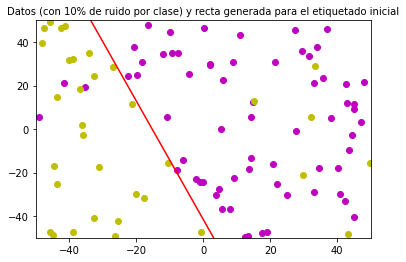

In [22]:
# Introduzco 10% de ruido en etiquetas negativas
for i in range(round(len(y) * 0.1)):
  index = np.random.randint(0, len(y))
  if y[index] == -1:
    y[index] *= -1
  else:
    i -= 1

# Introduzco 10% de ruido en etiquetas positivas
for i in range(round(len(y) * 0.1)):
  index = np.random.randint(0, len(y))
  if y[index] == 1:
    y[index] *= -1
  else:
    i -= 1

x1, x2 = [], []
# Diferencio clases de datos con dos arrays mirando las etiquetas
for etiqueta, dat in zip(y, x):
	if etiqueta == 1:
		x1.append(np.array([dat[0], dat[1]]))
	else:
		x2.append(np.array([dat[0], dat[1]]))
	
x1 = np.array(x1)
x2 = np.array(x2)

# Dibujo gráfica 2D
plt.scatter(x1[:,0], x1[:,1], c = 'm', label = '1')
plt.scatter(x2[:,0], x2[:,1], c = 'y', label = '-1')
eje_x = np.linspace(-50, 50, 100)
f_recta = a * eje_x + b
plt.plot(eje_x, f_recta, c = 'r')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.title('Datos (con 10% de ruido por clase) y recta generada para el etiquetado inicial', fontsize=10)
plt.show()

c)

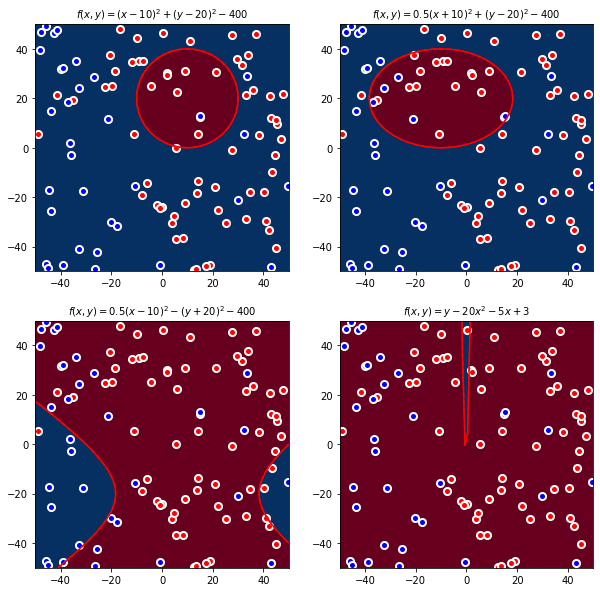

In [23]:
# Funciones frontera de clasificación
def f1(x,y):
  return (x-10)**2 + (y-20)**2 -400

def f2(x,y):
  return 0.5*(x+10)**2 + (y-20)**2 -400

def f3(x,y):
  return 0.5*(x-10)**2 - (y+20)**2 -400

def f4(x,y):
  return y - 20*x**2 - 5*x + 3

# Visualización de las funciones en nuestra muestra
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# función 1
X = np.linspace(-50, 50, 100)
Y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(X, Y)
Z = f1(X,Y)
ax.contourf(X, Y, Z, 50, cmap='RdBu',vmin=-1, vmax=1)
ax.contour(X, Y, Z, colors= 'r', levels=[-0.01, 0.01])
ax.scatter(x1[:,0], x1[:,1], c='r', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')
ax.scatter(x2[:,0], x2[:,1], c='b', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')
ax.set_title(r'$f(x,y) = (x-10)^2 + (y-20)^2 -400$', fontsize=10)

# función 2
ax2.set_title(r'$f(x,y) = 0.5(x+10)^2 + (y-20)^2 -400$', fontsize=10)
Z = f2(X,Y)
ax2.contourf(X, Y, Z, 50, cmap='RdBu',vmin=-1, vmax=1)
ax2.contour(X, Y, Z, colors= 'r', levels=[-0.01, 0.01])
ax2.scatter(x1[:,0], x1[:,1], c='r', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')
ax2.scatter(x2[:,0], x2[:,1], c='b', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')

# función 3
ax3.set_title(r'$f(x,y) = 0.5(x-10)^2 - (y+20)^2 -400$', fontsize=10)
Z = f3(X,Y)
ax3.contourf(X, Y, Z, 50, cmap='RdBu',vmin=-1, vmax=1)
ax3.contour(X, Y, Z, colors= 'r', levels=[-0.01, 0.01])
ax3.scatter(x1[:,0], x1[:,1], c='r', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')
ax3.scatter(x2[:,0], x2[:,1], c='b', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')

#función 4
ax4.set_title(r'$f(x,y) = y - 20x^2 - 5x + 3$', fontsize=10)
Z = f4(X,Y)
ax4.contourf(X, Y, Z, 50, cmap='RdBu',vmin=-1, vmax=1)
ax4.contour(X, Y, Z, colors= 'r', levels=[-0.01, 0.01])
ax4.scatter(x1[:,0], x1[:,1], c='r', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')
ax4.scatter(x2[:,0], x2[:,1], c='b', s=50, linewidth=2, cmap="RdYlBu", edgecolor='white')

plt.show()

**EXPLICACIÓN EJERCICIO 1.2 apartado c:** 
* Las regiones de separación obtenidas con respecto a la recta son generalmente mucho menos precisas a la hora de realizar una buena clasificación. Claramente podemos observar en la gráficas que ninguna función de las anteriormente utilizadas se aproxima mínimamente a separar los puntos mejor que la ecuación de la recta de apartados previos, el error es mucho más grande en estas funciones. Por supuesto, estas funciones no siguen ningún criterio, a diferencia de la recta, que se ha utilizado para separar explícitamente los puntos. Igualmente, el punto de este apartado es entender que a pesar de utilizar funciones más complejas, la aproximación no tiene por qué ser mejor, de hecho, a mayor complejidad de $H$ menor generalización fuera de la muestra. En nuestro caso la función objetivo es la función de la recta utilizada anteriormente y estamos intentando aproximar esa función con una clase de hipótesis mucho más compleja y que no contiene a la objetivo, usar funciones muy complejas no es sinónimo de mejor resultado.


# 2. MODELOS LINEALES (7 puntos)

EJERCICIO.2.1:  3 puntos - **ALGORITMO PERCEPTRÓN (PLA)**\
Implementar la función ajusta_PLA(datos, label, max_iter, vini) que calcula el hiperplano solución a un problema de clasificación binaria usando el algoritmo PLA. La entrada datos es una matriz donde cada item con su etiqueta está representado por una fila de la matriz, label el vector de etiquetas (cada etiqueta es un valor +1 o -1), max_iter es el número máximo de iteraciones permitidas y vini el valor inicial del vector. La función devuelve los coeficientes del hiperplano.

a) Ejecutar el algoritmo PLA con los datos empleados en el apartado 2a del ejercicio 1. Inicializar el algoritmo con: i) el vector cero y, ii) con vectores de números aleatorios en [0,1] (10 veces). Anotar el número medio de iteraciones necesarias en ambos para converger. Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales (obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificación. Valorar el resultado relacionando el punto de inicio con el número de iteraciones.

**b)** Hacer lo mismo usando los datos del apartado 2b del ejercicio 1. ¿Observa algún comportamiento diferente? En caso afirmativo diga cuál y las razones para que ello ocurra.

a)

In [24]:
# Algoritmo PLA
def ajusta_PLA(datos, label, max_iter, vini):
  w = vini

  # Me quedo con la w_ant para comprobar después si hay cambios tras una iteración
  w_ant = np.copy(w)
  it = 0

  while it < max_iter:

    for x, y in zip(datos, label):

      # Para cada dato vemos si está bien clasificado, si no, actualizamos w 
      if signo(np.dot(np.transpose(w), x)) != y:
        w = w + y * x
    
    # Si no ha habido cambios hemos terminado
    if np.array_equal(w, w_ant):
      break
    else:
      w_ant = np.copy(w)
    
    it += 1

  return w, it

# E_in del algoritmo perceptron
def E_in(w, datos, label):
  sumatoria = 0

  for x, y in zip(datos, label):
    if signo(np.dot(np.transpose(w), x)) != y:
      sumatoria += 1
  
  return sumatoria / len(datos)

# Generamos puntos con simula_unif
x = simula_unif(100, 2, [-50,50])
 
# Recogemos recta generada con simula_recta
a, b = simula_recta([-50,50])

# Recojo etiquetas para cada elemento de la muestra
y = [f(x1, x2, a, b) for x1, x2 in zip(x[:,0], x[:,1])]

# Parámetros para PLA
x = np.c_[np.ones(x.shape[0]), x] # Añadimos 1 a cada fila de la matriz 
max_iter = 1000
w_ini1 = np.zeros(3)
w_ini2 = []
iter1, iter2 = 0, []
w2 = []

# Ejecución i
w, iter1 = ajusta_PLA(x, y, max_iter, w_ini1)

# Ejecución ii
for i in range(10):
  random_array = np.random.uniform(0, 1, 3)
  w_ini2.append(random_array)
  w_aux, iter = ajusta_PLA(x, y, max_iter, w_ini2[i])
  iter2.append(iter)
  w2.append(np.array(w_aux))

w2 = np.array(w2)
w_ini2 = np.array(w_ini2)

# Calculamos los errores
error_vector = [E_in(w_i, x, y) for w_i in w2]

# Creamos una tabla con los datos de los pesos y errores
tabla_val = {'Pesos_ini' : [w_ini1, w_ini2],
        'Pesos_fin' : [w, w2],
        'Iteraciones' : [iter1, iter2],
        'E_in' : [E_in(w, x, y), error_vector]}
df = pd.DataFrame(tabla_val)

print("\nTABLA DE RESULTADOS:")
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))


TABLA DE RESULTADOS:
+----+--------------------------------------+--------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+
|    | Pesos_ini                            | Pesos_fin                                        | Iteraciones                                                  | E_in                                                         |
|----+--------------------------------------+--------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------|
|  0 | [0. 0. 0.]                           | [-1908.           220.91966008   192.33559616]   | 1000                                                         | 0.04                                                         |
|  1 | [[0.8292661  0.31325044 0.78227562]  | [[-1913.1707339    208.07262386   200.17

**EXPLICACIÓN EJERCICIO 2.1 apartado a:** 
* Tras varias iteraciones es posibles observar que inicializando el vector de pesos inicial a 0 obtenemos menor número de iteraciones que con la variante aleatoria de media (no siempre es así). Respecto a el punto de inicio, vemos que PLA es bastante sensible a este y por tanto es bastate influyente en el resultado escoger un buen w_inicial (vector de pesos).

b)

In [25]:
# Introduzco 10% de ruido en etiquetas negativas
for i in range(round(len(y) * 0.1)):
  index = np.random.randint(0, len(y))
  if y[index] == -1:
    y[index] *= -1
  else:
    i -= 1

# Introduzco 10% de ruido en etiquetas positivas
for i in range(round(len(y) * 0.1)):
  index = np.random.randint(0, len(y))
  if y[index] == 1:
    y[index] *= -1
  else:
    i -= 1

iter1, iter2 = 0, []
w2 = []

# Ejecución i
w, iter1 = ajusta_PLA(x, y, max_iter, w_ini1)

# Ejecución ii
for i in range(10):
  w_aux, iter = ajusta_PLA(x, y, max_iter, w_ini2[i])
  iter2.append(iter)
  w2.append(np.array(w_aux))

w2 = np.array(w2)

# Calculamos los errores
error_vector = [E_in(w_i, x, y) for w_i in w2]

# Creamos una tabla con los datos de los pesos y errores
tabla_val = {'Pesos_ini' : [w_ini1, w_ini2],
        'Pesos_fin' : [w, w2],
        'Iteraciones' : [iter1, iter2],
        'E_in' : [E_in(w, x, y), error_vector]}
df = pd.DataFrame(tabla_val)

print("\nTABLA DE RESULTADOS:")
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))


TABLA DE RESULTADOS:
+----+--------------------------------------+-----------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------+
|    | Pesos_ini                            | Pesos_fin                                     | Iteraciones                                                  | E_in                                                         |
|----+--------------------------------------+-----------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------|
|  0 | [0. 0. 0.]                           | [-257.           49.22905844   51.877082  ]   | 1000                                                         | 0.15                                                         |
|  1 | [[0.8292661  0.31325044 0.78227562]  | [[-249.1707339    51.23473312   35.6523159 ]  | [100

**EXPLICACIÓN EJERCICIO 2.1 apartado b:** 
* El número de iteraciones necesario para converger es el máximo impuesto, esto es así porque al introducir ruido en los datos estos se vuelven no separables linealmente, por lo que al intentar ajustar los pesos para clasificar bien, el algoritmo siempre va a fallar e intentará modificar el vector de pesos. Esto lleva a que nunca se cumple la condición de parada.

EJERCICIO.2.2:  4 puntos - **REGRESIÓN LOGÍSTICA (RL)**\
En este ejercicio emplearemos nuestra propia función objetivo f y un conjunto de datos D para ver cómo funciona regresión logística. Consideraremos d = 2 para que los datos sean fácilmente visualizables, y emplearemos $X$ = [0, 2] × [0, 2] con probabilidad uniforme de elegir cada $x\in X$ . Elegir una l ́ınea en el plano que pase por X como la frontera que separa la región en donde y toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de $X$ y calcular la línea que pasa por ambos.

Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:
* Inicializar el vector de pesos con valores 0.
* Parar el algoritmo cuando $||w^{(t+1)} − w^{(t)}|| < 0,01$, donde $w(t)$ denota el vector de pesos al final de la época $t$. Recuérdese que una época es un pase completo a través de los N ejemplos de nuestro conjunto de datos.
* Aplicar una permutación aleatoria de ${1, 2,..., N}$ a los índices de los datos, antes de usarlos en cada época del algoritmo.

A continuación, empleando la implementación anterior, realícese el siguiente experimento:

* Seleccione $N = 100$ puntos aleatorios ${xn}$ de $X$ y evalúe las respuestas ${yn}$ de todos ellos respecto de la frontera elegida.
* Ejecute RL para encontrar la función solución g, y evalúe el error $E_{out}$ usando para ello una nueva muestra de datos $(> 999)$. Se debe escoger experimentalmente tanto el learning rate (tasa de aprendizaje η) como el tamaño de batch.
* Repita el experimento 100 veces, y calcule los valores promedio de $E_{out}$, de porcentaje de error de clasificación, y de épocas necesarias para converger.

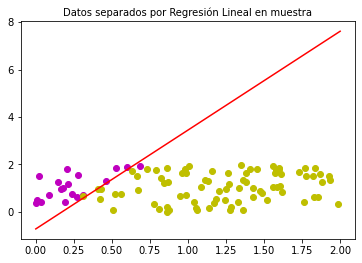


Ein: 0.11627956584025981



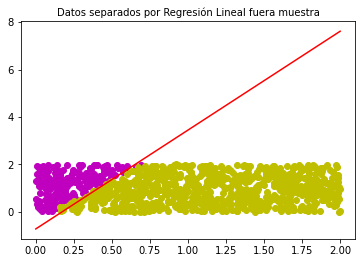


Eout: 0.12222165578174461

Puntos mal clasificados: 0.015



In [26]:
# Generamos puntos con simula_unif
X = simula_unif(1000, 2, [0,2]) # población total
x = simula_unif(100, 2, [0,2]) # muestra
 
# Recogemos recta generada con simula_recta
a, b = simula_recta([0,2])

# Recojo etiquetas para cada elemento de la muestra
y = [f(x1, x2, a, b) for x1, x2 in zip(x[:,0], x[:,1])]
y = np.array(y)
Y = [f(x1, x2, a, b) for x1, x2 in zip(X[:,0], X[:,1])]
Y = np.array(Y)

# Añadimos 1 a cada fila de la matriz 
x = np.c_[np.ones(x.shape[0]), x]
X = np.c_[np.ones(X.shape[0]), X]

# Algoritmo gradiente descendente estocástico RL
def sgdRL(x, y, lr, maxIters, min_bach_size, w_ini=np.array([0,0,0])):
  # Caracteristicas = caract_iniciales
  w = w_ini

  # Creamos indices desde 0 hasta el número de elementos que hay en la muestra, lo
  # utilizaremos más tarde para desordenar aleatoriamente los elementos de la muestra
  indices = np.arange(0, x.shape[0])

  sum = 0
  iter = 0
  n = min_bach_size
  w_ant = np.copy(w)

  if n > len(x):
    n = len(x)-1

  while iter < maxIters:
    #Desordenamos las muestras aleatoriamente
    np.random.shuffle(indices)
    x_aux = x[indices]
    y_aux = y[indices]
    w_ant = np.copy(w)

    # Recorremos todos los minibatches hasta el final
    for i in range(x.shape[0]):
      sum += np.dot(y_aux[i], x_aux[i]) / (1 + np.exp(np.dot(np.dot(y_aux[i], np.transpose(w)), x_aux[i])))
	   
      # Si terminamos un minibatch, entonces actualizamos los pesos
		  # Si hemos llegado al final, pero el minibatch no es del tamaño especificado,
		  # actualizamos igualmente, como si fuese un minibatch, pero de menor tamaño
      if i % n == 0 or i == x.shape[0]:
        w = w - lr * (-1 / n) * sum
        sum = 0

    iter += 1

    if np.linalg.norm(w_ant - w) < 0.01:
      break

  return w, iter

# Función del error de regresión logística
def Err_rl(w, datos, label):
  sumatoria = 0

  for i in range(len(datos)):
    sumatoria += np.log(1 + np.exp(np.dot(np.dot(-label[i], np.transpose(w)), datos[i])))

  return sumatoria / len(datos)

# Error de clasificación
def Err_clas(w, datos, label):
  sumatoria = 0

  for x, y in zip(datos, label):
    if signo(np.dot(np.transpose(w), x)) != y:
      sumatoria += 1
  
  return sumatoria / len(datos)

x1, x2 = [], []
# Diferencio clases de datos con dos arrays mirando las etiquetas
for etiqueta, dat in zip(y, x):
	if etiqueta == 1:
		x1.append(np.array([dat[1], dat[2]]))
	else:
		x2.append(np.array([dat[1], dat[2]]))
	
x1 = np.array(x1)
x2 = np.array(x2)

# Ejecutamos el algoritmo y obtenemos los pesos
w, iter = sgdRL(x, y, 0.5, 5000, 64)

# Dibujo gráfica 2D
plt.scatter(x1[:,0], x1[:,1], c = 'm')
plt.scatter(x2[:,0], x2[:,1], c = 'y')
eje_x = np.linspace(0, 2, 100)
f_recta = (-w[0] - w[1] * eje_x) / w[2]
plt.plot(eje_x, f_recta, c = 'r')
plt.title('Datos separados por Regresión Lineal en muestra', fontsize=10)
plt.show()

print("\nEin: {}\n".format(Err_rl(w, x, y)))

# Dibujo gráfica 2D
x1, x2 = [], []
# Diferencio clases de datos con dos arrays mirando las etiquetas
for etiqueta, dat in zip(Y, X):
	if etiqueta == 1:
		x1.append(np.array([dat[1], dat[2]]))
	else:
		x2.append(np.array([dat[1], dat[2]]))
	
x1 = np.array(x1)
x2 = np.array(x2)
plt.scatter(x1[:,0], x1[:,1], c = 'm')
plt.scatter(x2[:,0], x2[:,1], c = 'y')
eje_x = np.linspace(0, 2, 1000)
f_recta = (-w[0] - w[1] * eje_x) / w[2]
plt.plot(eje_x, f_recta, c = 'r')
plt.title('Datos separados por Regresión Lineal fuera muestra', fontsize=10)
plt.show()

print("\nEout: {}\n".format(Err_rl(w, X, Y)))
print("Puntos mal clasificados: {}\n".format(Err_clas(w, X, Y)))

In [27]:
# Repito el experimento 100 veces y veo el valor promedio de E_out
errores = 0
errores_clas = 0
iteraciones = 0
for i in range(100):
  X = simula_unif(1000, 2, [0,2]) # población total
  x = simula_unif(100, 2, [0,2])
 
  # Recogemos recta generada con simula_recta
  a, b = simula_recta([0,2])

  # Recojo etiquetas para cada elemento de la muestra
  y = [f(x1, x2, a, b) for x1, x2 in zip(x[:,0], x[:,1])]
  y = np.array(y)
  Y = [f(x1, x2, a, b) for x1, x2 in zip(X[:,0], X[:,1])]
  Y = np.array(Y)

  # Añadimos 1 a cada fila de la matriz 
  x = np.c_[np.ones(x.shape[0]), x]
  X = np.c_[np.ones(X.shape[0]), X]

  w, iter = sgdRL(x, y, 0.5, 5000, 64)

  iteraciones += iter
  errores += Err_rl(w, X, Y)
  errores_clas += Err_clas(w, X, Y)

print("Eout promedio de 100 experimentos: {}".format(errores/100))
print("Puntos promedio mal clasificados de 100 experimentos: {}".format(errores_clas/100))
print("Épocas promedio de 100 experimentos: {}".format(iteraciones/100))

Eout promedio de 100 experimentos: 0.1353514131939157
Puntos promedio mal clasificados de 100 experimentos: 0.03134999999999998
Épocas promedio de 100 experimentos: 367.45


**NOTA RL** : Tanto el learning rate como el tamaño de los minibtaches ha sido escogido teniendo en cuenta múltiples experimentos y ajustandome al que mejor resultado calidad/tiempo me daba. Obviamente, si aumentamos el learning rate ( a partir de 1-1.5 empieza a sufrir de overfitting) el resultado es mejor debido a nuestra condición de parada. Lo mismo ocurre con el tamaño de los minibatches, pero a la inversa, a menor tamaño mejor resultado.

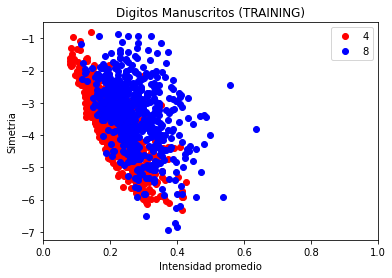

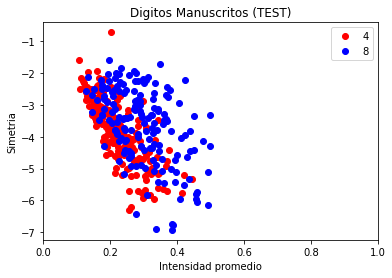


1) Regresión lineal

Ein:  0.22780569514237856
Eout:  0.25136612021857924

2) Algoritmo Pocket

Ein:  0.228643216080402
Eout:  0.2459016393442623

3) Algoritmo Perceptron

Ein:  0.30904522613065327
Eout:  0.3005464480874317

4) Regresión Logísticas

Ein:  0.22529313232830822
Eout:  0.25956284153005466


In [28]:
# Funcion para leer los datos
def readData(file_x, file_y, digits, labels):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la digits[0] o la digits[1]
	for i in range(0,datay.size):
		if datay[i] == digits[0] or datay[i] == digits[1]:
			if datay[i] == digits[0]:
				y.append(labels[0])
			else:
				y.append(labels[1])
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

path_trx, path_try = '/content/drive/My Drive/Colab Notebooks/datos2/X_train.npy', '/content/drive/My Drive/Colab Notebooks/datos2/y_train.npy'
path_tex, path_tey = '/content/drive/My Drive/Colab Notebooks/datos2/X_test.npy', '/content/drive/My Drive/Colab Notebooks/datos2/y_test.npy'

# Lectura de los datos de entrenamiento
x, y = readData(path_trx, path_try, [4,8], [-1,1])
# Lectura de los datos para el test
x_test, y_test = readData(path_tex, path_tey, [4,8], [-1,1])

#mostramos los datos
fig, ax = plt.subplots()
ax.plot(np.squeeze(x[np.where(y == -1),1]), np.squeeze(x[np.where(y == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x[np.where(y == 1),1]), np.squeeze(x[np.where(y == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TRAINING)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(np.squeeze(x_test[np.where(y_test == -1),1]), np.squeeze(x_test[np.where(y_test == -1),2]), 'o', color='red', label='4')
ax.plot(np.squeeze(x_test[np.where(y_test == 1),1]), np.squeeze(x_test[np.where(y_test == 1),2]), 'o', color='blue', label='8')
ax.set(xlabel='Intensidad promedio', ylabel='Simetria', title='Digitos Manuscritos (TEST)')
ax.set_xlim((0, 1))
plt.legend()
plt.show()


print("\n1) Regresión lineal\n")

# pseudoinversa
def pseudoinversa(x,y):
    w = np.linalg.pinv(x)
    w = np.dot(w,y)
    return w

w = pseudoinversa(x,y)

# Errores
Ein =  Err_clas(w, x, y)
Eout = Err_clas(w, x_test,y_test)

print("Ein: ", Ein)
print("Eout: ", Eout)

print("\n2) Algoritmo Pocket\n")

def pocket(datos, label, max_iter, vini):
  w = best_w = vini
  error_min = 9999.0

  # Me quedo con la w_ant para comprobar después si hay cambios tras una iteración
  w_ant = np.copy(w)
  it = 0

  while it < max_iter:

    for x, y in zip(datos, label):

      # Para cada dato vemos si está bien clasificado, si no, actualizamos w 
      if signo(np.dot(np.transpose(w), x)) != y:
        w = w + y * x

    if (Err_clas(w,datos,label) < error_min):
       error_min = Err_clas(w,datos,label)
       best_w = w
    
    # Si no ha habido cambios hemos terminado
    if np.array_equal(w, w_ant):
      break
    else:
      w_ant = np.copy(w)
    
    it += 1

  return best_w, it

w_pocket, iter = pocket(x,y,1000,np.zeros(3))

# Errores
Ein =  Err_clas(w_pocket, x, y)
Eout = Err_clas(w_pocket, x_test,y_test)

print("Ein: ", Ein)
print("Eout: ", Eout)

print("\n3) Algoritmo Perceptron\n")

w_pla, iter = ajusta_PLA(x, y, 1000, np.zeros(3))

# Errores
Ein =  Err_clas(w_pla, x, y)
Eout = Err_clas(w_pla, x_test,y_test)

print("Ein: ", Ein)
print("Eout: ", Eout)


print("\n4) Regresión Logísticas\n")

w_rl, iter = sgdRL(x, y, 0.5, 5000, 64)

# Errores
Ein =  Err_clas(w_rl, x, y)
Eout = Err_clas(w_rl, x_test,y_test)

print("Ein: ", Ein)
print("Eout: ", Eout)

In [29]:
print("\n5) Algoritmo Pocket (con pesos iniciales de regr.lineal)\n")
w_pocket, iter = pocket(x,y,1000,w)

# Errores
Ein_pock =  Err_clas(w_pocket, x, y)
Eout_pock = Err_clas(w_pocket, x_test,y_test)

print("Ein: ", Ein_pock)
print("Eout: ", Eout_pock)

print("\n6) Algoritmo Perceptron (con pesos iniciales de regr.lineal)\n")

w_pla, iter = ajusta_PLA(x, y, 1000, w)

# Errores
Ein_pla =  Err_clas(w_pla, x, y)
Eout_pla = Err_clas(w_pla, x_test,y_test)

print("Ein: ", Ein_pla)
print("Eout: ", Eout_pla)


print("\n7) Regresión Logísticas (con pesos iniciales de regr.lineal)\n")

w_rl, iter = sgdRL(x, y, 0.5, 5000, 64, w)

# Errores
Ein_rl =  Err_clas(w_rl, x, y)
Eout_rl = Err_clas(w_rl, x_test,y_test)

print("Ein: ", Ein_rl)
print("Eout: ", Eout_rl)


5) Algoritmo Pocket (con pesos iniciales de regr.lineal)

Ein:  0.22529313232830822
Eout:  0.2540983606557377

6) Algoritmo Perceptron (con pesos iniciales de regr.lineal)

Ein:  0.2520938023450586
Eout:  0.25136612021857924

7) Regresión Logísticas (con pesos iniciales de regr.lineal)

Ein:  0.22278056951423786
Eout:  0.25956284153005466


**EXPLICACIÓN EJERCICIO BONUS apartado c:** 
* Se observa una mejora en general de los resultados de los algoritmos, y es que regresión lineal se puede utilizar para obtener un vector de pesos que nos sirvan para inicializar el aprendizaje en el resto de algoritmo, y es que algoritmos como perceptron son muy sensibles a la inicialización. Gracias a las bondades de la pseudoinversa podemos obtener un vector de pesos inicial bastante óptimo, y es que regresión lineal busca el vector de pesos óptimo en términos de error dentro de la muestra, pero, ¿este óptimo se refleja en el error fuera de la muestra? La respuesta es sencilla, sí. En el caso de la regresión lineal hay fórmulas exactas para los valores esperados de $E_{in}$ y $E_{out}$.

In [30]:
def calcular_cota(e_in, N, epsilon, dim):
  return e_in + np.sqrt((8/N) * np.log((4 * ((2 * N) ** dim + 1)) / epsilon))

cota_Ein = calcular_cota(Ein,x.shape[0],0.05,3)
cota_Eout = calcular_cota(Eout,x_test.shape[0],0.05,3)

cota_Ein_pla = calcular_cota(Ein_pla,x.shape[0],0.05,3)
cota_Eout_pla = calcular_cota(Eout_pla,x_test.shape[0],0.05,3)

cota_Ein_pock = calcular_cota(Ein_pock,x.shape[0],0.05,3)
cota_Eout_pock = calcular_cota(Eout_pock,x_test.shape[0],0.05,3)

cota_Ein_rl = calcular_cota(Ein_rl,x.shape[0],0.05,3)
cota_Eout_rl = calcular_cota(Eout_rl,x_test.shape[0],0.05,3)


print("\n3) Regresión lineal\n")
print("Cota de Ein: ", cota_Ein)
print("Cota de Eout: ", cota_Eout)

print("\n2) Algoritmo Perceptron\n")
print("Cota de Ein: ", cota_Ein_pla)
print("Cota de Eout: ", cota_Eout_pla)

print("\n3) Algoritmo Pocket\n")
print("Cota de Ein: ", cota_Ein_pock)
print("Cota de Eout: ", cota_Eout_pock)

print("\n4) Regresión logística\n")
print("Cota de Ein: ", cota_Ein_rl)
print("Cota de Eout: ", cota_Eout_rl)


3) Regresión lineal

Cota de Ein:  0.6562296377990118
Cota de Eout:  0.9863999626488285

2) Algoritmo Perceptron

Cota de Ein:  0.6830303078157622
Cota de Eout:  0.9782032413373529

3) Algoritmo Pocket

Cota de Ein:  0.6562296377990118
Cota de Eout:  0.9809354817745115

4) Regresión logística

Cota de Ein:  0.6537170749849415
Cota de Eout:  0.9863999626488285


**EXPLICACIÓN EJERCICIO BONUS apartado d:** 
* Todas las cotas rondan los mismos valores y es que la cota de generalización VC es independiente de la función objetivo, la clase de hipótesis que estemos usando o cualquier algoritmo utilizado, por esa razón la cota es prácticamente idéntica en todos los algoritmos utilizados. Esta cota aplica en todos los casos, y es verdad también debido a esto que no se ajusta de manera exacta siempre.